# Lab 3: Extending Logistic Regression

### By: Quentin Morris, Arkadijs Slobodkins, Daniel Willborn

#### Business Understanding:

This is a dataset containing the various chemical attributes of red wine and their quality assignment taken from the following website: https://archive.ics.uci.edu/ml/datasets/Wine. The purpose of using this dataset is to apply machine learning to find correlations between each wine's chemical attributes and their respective quality, and be able to then have a program determine the quality of the wine based on its chemical data. The application for this would be that it could allow wineries to make a more objective determination on the quality of their wines, allowing them to better optimise their products based on chemical composition. Wineries who use this classification model would be able to determine wine quality before the product has to be shipped to them, allowing for more efficient picking of products. It would also allow them to determine prices they are willing to pay versus the shipping costs of wines so they can guarantee a profit margin of their liking while still paying the seller a valid price based on quality. 

In [283]:
import pandas as pd

wine_data = pd.read_csv('winequality-white.csv', sep=";")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [284]:
#used this source to normalize feature data between 0 and 1 using minmaxscaler
#https://stackoverflow.com/questions/43834242/sklearn-minmaxscaler-scale-specific-columns-only

from sklearn.preprocessing import minmax_scale

wine_data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']] = minmax_scale(wine_data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])
# let's break up the age variable
wine_data['quality_rating'] = pd.cut(wine_data['quality'],[0,4,5,6,9],
                                 labels=[1,2,3,4]) # this creates a new variable
wine_data.quality_rating.describe()
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_rating
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032,6,3
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935,6,3
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710,6,3
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,6,3
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,6,3


In [285]:
#used this link for train_test_split
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split

wine_features = wine_data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
wine_target = wine_data[['quality_rating']]

X_train, X_test, y_train, y_test = train_test_split(wine_features, wine_target, test_size = 0.2)
print('Counts of Quality in Entire Dataset:\n',wine_target['quality_rating'].value_counts())
print('Counts of Quality in Training Dataset:\n',y_train['quality_rating'].value_counts())
print('Counts of Quality in Testing Dataset:\n',y_test['quality_rating'].value_counts())

Counts of Quality in Entire Dataset:
 3    2198
2    1457
4    1060
1     183
Name: quality_rating, dtype: int64
Counts of Quality in Training Dataset:
 3    1760
2    1170
4     838
1     150
Name: quality_rating, dtype: int64
Counts of Quality in Testing Dataset:
 3    438
2    287
4    222
1     33
Name: quality_rating, dtype: int64


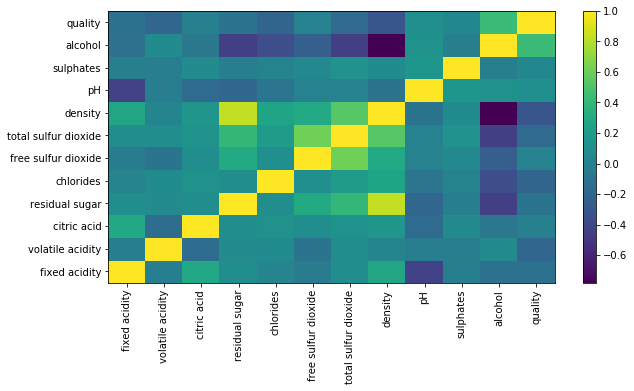

In [286]:
import matplotlib.pyplot as plt

vars_to_use = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality'] # pick vars
plt.pcolor(wine_data[vars_to_use].corr()) # do the feature correlation plot

# fill in the indices
plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(rotation = 90)
plt.colorbar()
plt.show()

#### Description of Final Dataset
The dataset is unbalanced in the quality attribute, the feature we are looking to classify wines by, which influenced us to make the decision to group qualities together. Originally, most of the wines have qualities of 5 and 6. We figured we should bin together some of the wines below 5 and above 6 in order to get a better sampling of poor and excellent wines for out regression classifier. We tried a number of splits to keep 5 and 6 seperate, but keeping them together seemed to produce the best results showing they must be very similar in their attributes. Some of the features in the dataset have much larger values than others (total sulfur dioxide and sulphates for example, see first wine_data.head()) which could affect the weights formed during regression, so we normalized the data to fall between 0 and 1. There are not any clear indicators of features that correlate highly to quality besides alcohol content, so we did not get rid of any features to give the model more features to look at for classification and possibly provide better accuracy.

#### Argument for 80/20 split

For our dataset an 80/20 split seems like a fair split decision. The distribution of qualities is consistent from the entire datset to our 80/20 train/test split, showing that this would be a valid splitting method. If our data was represented over time, say alcohol levels at different months of fermentation, an 80/20 split may capture many low alcohol levels in the train split and only see high alcohol levels in the test split which would confuse the classifier later on. The data is static, not time series data, so there will not be any time discrepancies to worry about from the training to testing split.

In [287]:
#used notebook from class to implement Binary Logistic Regression
#https://github.com/eclarson/MachineLearningNotebooks/blob/master/05.%20Logistic%20Regression.ipynb
#begin binary logistic regression

import numpy as np
class BinaryLogisticRegressionBase:
    # private:
    def __init__(self, eta, iterations=20, C=0.1):
        self.C = C
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        return 'Base Binary Logistic Regression Object, Not Trainable'
    
    # convenience, private and static:
    @staticmethod
    def _sigmoid(theta):
        return 1/(1+np.exp(-theta)) 
    
    @staticmethod
    def _add_bias(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
    # public:
    def predict_proba(self, X, add_bias=True):
        # add bias term if requested
        Xb = self._add_bias(X) if add_bias else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction
    
    
        
blr = BinaryLogisticRegressionBase(0.1)
print(blr)

Base Binary Logistic Regression Object, Not Trainable


In [288]:
#used notebook from class to implement Binary Logistic Regression
#https://github.com/eclarson/MachineLearningNotebooks/blob/master/05.%20Logistic%20Regression.ipynb

#addding the model training function
# inherit from base class
import pdb
class BinaryLogisticRegression(BinaryLogisticRegressionBase):
    #private:
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Binary Logistic Regression Object'
        
    def _get_gradient(self,X,y):
        # programming \sum_i (yi-g(xi))xi
        gradient = np.zeros(self.w_.shape) # set gradient to zero
        for (xi,yi) in zip(X,y):
            # the actual update inside of sum
            #pdb.set_trace()
            gradi = (yi - self.predict_proba(xi,add_bias=False))*xi 
            # reshape to be column vector and add to gradient
            gradient += gradi.reshape(self.w_.shape) 
        
        return gradient/float(len(y))
       
    # public:
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = self._get_gradient(Xb,y)
            self.w_ += gradient*self.eta # multiply by learning rate 

            
blr = BinaryLogisticRegression(0.1)
print(blr)

Untrained Binary Logistic Regression Object


In [289]:
from sklearn.metrics import accuracy_score
X_b = wine_features.to_numpy()
y_b = (wine_target.to_numpy()>2).astype(np.int)

blr = BinaryLogisticRegression(eta=0.1,iterations=10)
blr.fit(X_b,y_b)
yhat = blr.predict(X_b)
print('Accuracy of: ',accuracy_score(y_b,yhat))

Accuracy of:  0.6651694569211923


In [290]:
#used notebook from class to implement Vectorized Binary Logistic Regression
#https://github.com/eclarson/MachineLearningNotebooks/blob/master/05.%20Logistic%20Regression.ipynb


import numpy as np
from scipy.special import expit

params = dict(eta=0.001, iterations=500)

class VectorBinaryLogisticRegression(BinaryLogisticRegression):
    # inherit from our previous class to get same functionality
    @staticmethod
    def _sigmoid(theta):
        # increase stability, redefine sigmoid operation
        return expit(theta) #1/(1+np.exp(-theta))
    
    # but overwrite the gradient calculation
    def _get_gradient(self,X,y):
        ydiff = y-self.predict_proba(X,add_bias=False).ravel() # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        
        return gradient.reshape(self.w_.shape)

# use same params as defined above
blr = VectorBinaryLogisticRegression(**params)
blr.fit(X_train.to_numpy(),(y_train.quality_rating.to_numpy()>2))
print(blr.w_)
yhat = blr.predict(X_test.to_numpy())
print('Accuracy of: ',accuracy_score(y_test.quality_rating.to_numpy()>2,yhat))

[[0.07297558]
 [0.01971832]
 [0.00887427]
 [0.01474146]
 [0.00474061]
 [0.00523051]
 [0.00837952]
 [0.01785515]
 [0.00612678]
 [0.03371323]
 [0.02441715]
 [0.04697101]]
Accuracy of:  0.673469387755102


In [291]:
#used notebook from class to implement Multiclass Logistic Regression
#https://github.com/eclarson/MachineLearningNotebooks/blob/master/05.%20Logistic%20Regression.ipynb

class LogisticRegression:
    def __init__(self, eta, iterations=20,C=0.1):
        self.eta = eta
        self.iters = iterations
        self.C=C
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = (y==yval) # create a binary problem
            # train the binary classifier for this class
            blr = VectorBinaryLogisticRegression(self.eta,
                                                 self.iters)
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        
    def predict_proba(self,X):
        probs = []
        for blr in self.classifiers_:
            probs.append(blr.predict_proba(X)) # get probability for each classifier
        
        return np.hstack(probs) # make into single matrix
    
    def predict(self,X):
        return self.unique_[np.argmax(self.predict_proba(X),axis=1)] # take argmax along row
    

In [292]:
#used this notebook from class to implement stochastic gradient descent 
#https://github.com/eclarson/MachineLearningNotebooks/blob/master/06.%20Optimization.ipynb

class StochasticLogisticRegression(BinaryLogisticRegression):
    # stochastic gradient calculation 
    def _get_gradient(self,X,y):
        idx = int(np.random.rand()*len(y)) # grab random instance
        ydiff = y[idx]-self.predict_proba(X[idx],add_bias=False) # get y difference (now scalar)
        gradient = X[idx] * ydiff[:,np.newaxis] # make ydiff a column vector and multiply through
        
        gradient = gradient.reshape(self.w_.shape)
        #gradient[1:] += -2 * self.w_[1:] * self.C
        
        return gradient
    


In [293]:
#used this notebook from class to implement Newton's method for gradient descent 
#https://github.com/eclarson/MachineLearningNotebooks/blob/master/06.%20Optimization.ipynb

from numpy.linalg import pinv
class HessianBinaryLogisticRegression(BinaryLogisticRegression):
    # just overwrite gradient function
    def _get_gradient(self,X,y):
        g = self.predict_proba(X,add_bias=False).ravel() # get sigmoid value for all classes
        hessian = X.T @ np.diag(g*(1-g)) @ X - 2 * self.C # calculate the hessian

        ydiff = y-g # get y difference
        gradient = np.sum(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        gradient = gradient.reshape(self.w_.shape)
        #gradient[1:] += -2 * self.w_[1:] * self.C
        
        return pinv(hessian) @ gradient


In [294]:
#used notebook from class to implement L2 Regularized Logistic Regression
#https://github.com/eclarson/MachineLearningNotebooks/blob/master/05.%20Logistic%20Regression.ipynb

class RegularizedBinaryLogisticRegression(VectorBinaryLogisticRegression):
    # extend init functions
    def __init__(self, C=0.0, **kwds):        
        # need to add to the original initializer 
        self.C = C
        # but keep other keywords
        super().__init__(**kwds) # call parent initializer
        
        
    # extend previous class to change functionality
    def _get_gradient(self,X,y):
        # call get gradient from previous class
        gradient = super()._get_gradient(X,y)
        
        # add in regularization (to all except bias term)
        gradient[1:] += -2 * self.w_[1:] * self.C
        return gradient
    

In [295]:
#used notebook from class to implement L2 Regularized Logistic Regression
#https://github.com/eclarson/MachineLearningNotebooks/blob/master/05.%20Logistic%20Regression.ipynb

# now redefine the Logistic Regression Function where needed
class RegularizedLogisticRegression(LogisticRegression):
    def __init__(self, C=0.0, **kwds):        
        # need to add to the original initializer 
        self.C = C
        # but keep other keywords
        super().__init__(**kwds) # call parent initializer
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = y==yval # create a binary problem
            # train the binary classifier for this class
            blr = RegularizedBinaryLogisticRegression(eta=self.eta,
                                                      iterations=self.iters,
                                                      C=self.C)
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T

In [296]:
#used notebook from class to implement L2 Regularized Logistic Regression
#https://github.com/eclarson/MachineLearningNotebooks/blob/master/05.%20Logistic%20Regression.ipynb

class RegularizedBinaryLogisticRegressionL1(VectorBinaryLogisticRegression):
    # extend init functions
    def __init__(self, C=0.0, **kwds):        
        # need to add to the original initializer 
        self.C = C
        # but keep other keywords
        super().__init__(**kwds) # call parent initializer
        
        
    # extend previous class to change functionality
    def _get_gradient(self,X,y):
        # call get gradient from previous class
        gradient = super()._get_gradient(X,y)
        
        # add in regularization (to all except bias term)
      
        signs = np.zeros((len(self.w_),1))
        
        for s in range(1,len(self.w_)):
            if self.w_[s] < 0:     
                signs[s] = -1
            elif self.w_[s] > 0:
                signs[s] = 1
            else:
                signs[s] = 0

        gradient[1:] -= self.C * signs[1:]
        return gradient
    

In [297]:
#Exceptional Work

class MeanLogisticRegression(BinaryLogisticRegression):
    def _get_gradient(self,X,y):
        
        #gradient for MeanLogisticRegression=2/m*X*[y-yhat]*yhat*(1-yhat)
        ydiff = y-self.predict_proba(X,add_bias=False).ravel() # get y difference
        ydiff=ydiff*self.predict_proba(X,add_bias=False).ravel()
        ydiff=ydiff*(1-self.predict_proba(X,add_bias=False).ravel())*2/ydiff.size
        
        
       # gradient = 2*np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        gradient=np.transpose(X)@ydiff
        gradient = gradient.reshape(self.w_.shape)
        gradient[1:] += -2 * self.w_[1:] * self.C
        
        return gradient

In [298]:
#Choosing Optimization Technique

from ipywidgets import widgets
import time
#get_C = 0


def printLR():
    start = time.time()
    lr = LogisticRegression(eta=0.01, iterations=1500)
    lr.fit(X_train.to_numpy(),y_train.quality_rating.to_numpy())
    yhat = lr.predict(X_test.to_numpy())
    end = time.time()
    elapsed = end - start
    print(lr)
    print('Accuracy of: ',accuracy_score(y_test.to_numpy(),yhat))
    print('Elaped time: %f seconds'%elapsed)
    
def printRLR():
    start = time.time()
    lr = RegularizedLogisticRegression(eta=0.01, iterations=1500)
    lr.fit(X_train.to_numpy(),y_train.quality_rating.to_numpy())
    yhat = lr.predict(X_test.to_numpy())
    end = time.time()
    elapsed = end - start
    print(lr)
    print('Accuracy of: ',accuracy_score(y_test.to_numpy(),yhat))
    print('Elaped time: %f seconds'%elapsed)
    
def printSLR():
    start = time.time()
    slr = StochasticLogisticRegression(0.05,500) # take a lot more steps!!
    slr.fit(X_train.to_numpy(),y_train.quality_rating.to_numpy())
    yhat = slr.predict(X_test.to_numpy())
    end = time.time()
    elapsed = end - start
    print(slr)
    print('Accuracy of: ',accuracy_score(y_test.to_numpy(),yhat))
    print('Elaped time: %f seconds'%elapsed)
    
def printHLR():
    start = time.time()
    hlr = HessianBinaryLogisticRegression(eta=1.0,iterations=4)
    hlr.fit(X_train.to_numpy(),y_train.quality_rating.to_numpy())   
    yhat = hlr.predict(X_test.to_numpy()) 
    end = time.time()
    elapsed = end - start
    print(hlr)
    print('Accuracy of: ',accuracy_score(y_test.to_numpy(),yhat))
    print('Elaped time: %f seconds'%elapsed)
    
def printMLR():
    start = time.time()
    mlr = MeanLogisticRegression(0.05,500)
    mlr.fit(X_train.to_numpy(),(y_train.quality_rating.to_numpy()))
    print(mlr)
    yhat = mlr.predict(X_test.to_numpy())
    end = time.time()
    elapsed = end - start
    print('Accuracy of: ',accuracy_score(y_test.to_numpy(),yhat))
    print('Elaped time: %f seconds'%elapsed)
    

def on_select(Type):
    if Type == 'Standard LR':
        printLR()
    elif Type == 'Regularized LR (L2)':
        printRLR()
    elif Type == 'Stochastic LR':
        printSLR()
    elif Type == 'Hessian LR':
        printHLR()
    elif Type == 'Mean^2 LR':
        printMLR()
        
widgets.interact(on_select, Type = ['Standard LR','Regularized LR (L2)','Stochastic LR','Hessian LR','Mean^2 LR'])

interactive(children=(Dropdown(description='Type', options=('Standard LR', 'Regularized LR (L2)', 'Stochastic …

<function __main__.on_select(Type)>

In [299]:
print('< Timing and Accuracy for all methods >')

start = time.time()
lr = LogisticRegression(eta=0.01, iterations=1500,C=.01)
lr.fit(X_train.to_numpy(),y_train.quality_rating.to_numpy())
yhat = lr.predict(X_test.to_numpy())
end = time.time()
elapsed1 = end - start
accuracy1 = accuracy_score(y_test.to_numpy(),yhat)
print('Standard Logistic Regression')
print('Accuracy of: ',accuracy1)
print('Elapsed time: %f seconds'%elapsed1)

start = time.time()
rlr = RegularizedLogisticRegression(eta=0.01, iterations=1500,C=.01)
rlr.fit(X_train.to_numpy(),y_train.quality_rating.to_numpy())
yhat = rlr.predict(X_test.to_numpy())
end = time.time()
elapsed2 = end - start
accuracy2 = accuracy_score(y_test.to_numpy(),yhat)
print('Regularized Logistic Regression (L2)')
print('Accuracy of: ',accuracy2)
print('Elapsed time: %f seconds'%elapsed2)

start = time.time()
slr = StochasticLogisticRegression(0.05,500,C=.01) # take a lot more steps!!
slr.fit(X_train.to_numpy(),y_train.quality_rating.to_numpy())
yhat = slr.predict(X_test.to_numpy())
end = time.time()
elapsed3 = end - start
accuracy3 = accuracy_score(y_test.to_numpy(),yhat)
print('Stochastic Logistic Regression')
print('Accuracy of: ',accuracy3)
print('Elapsed time: %f seconds'%elapsed3)

start = time.time()
hlr = HessianBinaryLogisticRegression(eta=1.0,iterations=4,C=.01)
hlr.fit(X_train.to_numpy(),y_train.quality_rating.to_numpy())   
yhat = hlr.predict(X_test.to_numpy()) 
end = time.time()
elapsed4 = end - start
accuracy4 = accuracy_score(y_test.to_numpy(),yhat)
print('Hessian Logistic Regression')
print('Accuracy of: ',accuracy4)
print('Elapsed time: %f seconds'%elapsed4)

start = time.time()
mlr = MeanLogisticRegression(0.05,500,C=1)
mlr.fit(X_train.to_numpy(),(y_train.quality_rating.to_numpy()))
yhat = mlr.predict(X_test.to_numpy())
end = time.time()
elapsed5 = end - start
accuracy5 = accuracy_score(y_test.to_numpy(),yhat)
print('Mean Squared Logistic Regression')
print('Accuracy of: ',accuracy5)
print('Elapsed time: %f seconds'%elapsed5)

< Timing and Accuracy for all methods >
Standard Logistic Regression
Accuracy of:  0.44693877551020406
Elapsed time: 1.901665 seconds
Regularized Logistic Regression (L2)
Accuracy of:  0.44693877551020406
Elapsed time: 2.092070 seconds
Stochastic Logistic Regression
Accuracy of:  0.0336734693877551
Elapsed time: 0.015636 seconds
Hessian Logistic Regression
Accuracy of:  0.0336734693877551
Elapsed time: 0.320887 seconds
Mean Squared Logistic Regression
Accuracy of:  0.0336734693877551
Elapsed time: 0.250142 seconds


In [300]:
#sklearn implementation for comparison
from sklearn.linear_model import LogisticRegression as SKLogisticRegression

start = time.time()
lr_sk = SKLogisticRegression(solver='liblinear') # all params default

lr_sk.fit(X_train.to_numpy(),y_train.quality_rating.to_numpy())
print(np.hstack((lr_sk.intercept_[:,np.newaxis],lr_sk.coef_)))
yhat = lr_sk.predict(X_test.to_numpy())
end = time.time()
elapsed6 = end - start
accuracy6 = accuracy_score(y_test.to_numpy(),yhat)
print('Accuracy of: ',accuracy6)
print('Elapsed Time: ',elapsed6)

[[-2.76692134  2.05707698  4.35382936 -0.31352398 -2.81753241 -0.2189971
  -2.04925394 -1.99699308 -0.20924572  0.47108488 -0.44843278 -2.33922667]
 [ 0.51101801  0.35671256  3.38129746 -0.10092385 -2.0392331   0.69220364
  -1.40874457  1.30265709  0.40984188 -0.48073128 -0.9300138  -4.90651223]
 [ 0.01839423 -0.5553926  -3.18462596  0.23947417  0.97087844  0.29044754
   0.2976071  -0.14347161  0.57617072 -0.22695799  0.12028066  0.92849981]
 [-2.86784193 -0.21099619 -3.10753479 -0.86726123  2.17684375 -2.76455182
   1.60374473 -0.80158956 -1.22661074  0.86372987  0.83213337  4.51755902]]
Accuracy of:  0.5489795918367347
Elapsed Time:  0.052093505859375


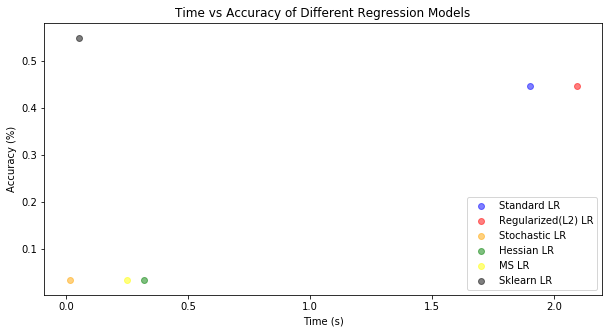

In [301]:
plt.rcParams["figure.figsize"] = [10,5]
all_accuracy = [accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6]
all_time = [elapsed1,elapsed2,elapsed3,elapsed4,elapsed5,elapsed6]
reg_types = ['Standard LR', 'Regularized(L2) LR', 'Stochastic LR', 'Hessian LR', 'MS LR', 'Sklearn LR']
colors = ['blue','red','orange','green','yellow','black']

for i in range (0,len(colors)):
    plt.scatter(all_time[i],all_accuracy[i],alpha = 0.5,c = colors[i], label = reg_types[i])
    
plt.legend()
plt.title('Time vs Accuracy of Different Regression Models')
plt.xlabel('Time (s)')
plt.ylabel('Accuracy (%)')
plt.show()

#### Varying Value of C

Varying C did not have significant effect on the accuracy of the dataset. The most accuracy was achieved for C
in between 0.1 and 1. Accuracy decreased only slightly even for extremely small values of C, but decreased somewhat more for large C.
This is an indicator that our dataset migth be susceptible to underfitting. Since all attributes of the dataset have low corellations,
overfitting is not a primary concern. Therefore, for similar type of datasets it is reasonable to assume that smaller values of 
C are needed to prevent underfitting. 


#### Comparing Results of Each Optimization Technique 

After optimizing each of our custom regression models' parameters, the Stochastic regression was able to classify the wines the fastest, but with very little accuracy. The Hessian and MS logistic regression models ran faster than the Standard and L2 Regularized models, but also had a very low accuracy. The Standard and L2 Regularized models achieved an accuracy close to that of the Sklearn implementation of multiclass logistic regression, but it took much longer to get a less accurate result. The Sklearn logistic regression was only slower than our Stochastic regression implementation but had a much higher accuracy in a similar amount of time. 

#### Deployment:

The Scikit Learn implimentation of linear regression is the most usable choice for this dataset, as it producses a significantly higher accuracy than all of our implementations, while only being marginally slower than the hessian implementation. In this case, a higher accuracy will end up being more important than the minimal time difference. The accuracy for this dataset is low using any of the categorization methods (custom or Scikit Learn) and is highly dependent on how cutoff points are determined for quality. Since most of the data lies in the quality 5-6 range, if these two are considered together the learning method can always predict 5 or 6 and be very accurate, but not very useful. If qualities 5 and 6 are separated, the features for them are so similar that the program cannot truly distinguish between the two, and the accuracy is negatively affected. There are no clear indicators as to which features most correlate to the quality of the wine (seen in the correlation matrix at the beginning of the notebook), so the dataset may be difficult for any of the classifiers, either the custom regression models we implement or the SKlearn model, to classify the wines with high accuracy. If one implementation should be chosen though, it would have to be the SKlearn implementation of multiclass logistic regression due to improved accuracy and minimal compute time.  